### Topics for today
* Introduction to unsupervised learning
* Clustering & its applications
* Layman's introduction to KMeans Algorithm
* Using KMeans from scikit-learn

<hr>

### 1. Introduction to unsupervised learning

* Unsupervised Learning is a type of Machine learning to draw inferences from unlabelled datasets.
* Model tries to find relationship between data.
* Most common unsupervised learning method is clustering which is used for exploratory data analysis to find hidden patterns or grouping in data

### 2. Clustering & it's applications

* A learning technique to group a set of objects in such a way that objects of same group are more similar to each other than from objects of other group.
* Applications of clustering are as follows
    * Automatically organizing the data
    * Labeling data
    * Understanding hidden structure of data
    * News Cloustering for grouping similar news together
    * Customer Segmentation
    * Suggest social groups

### 3. Layman's introduction to KMeans

* http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

### 4. Using KMeans from scikit-learn

In [2]:
from sklearn.datasets import make_blobs, make_moons

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

* This step is just for random data generation

In [8]:
X,_ = make_blobs(n_features=2, n_samples=1000, cluster_std=.5)

In [12]:
X.shape

(1000, 2)

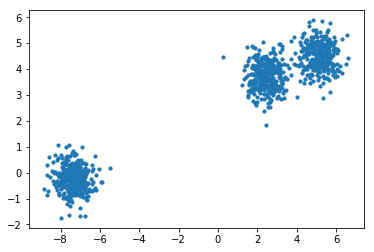

In [9]:
plt.scatter(X[:,0], X[:,1],s=10)

In [6]:
from sklearn.cluster import KMeans

In [10]:
kmeans = KMeans(n_clusters=3)

### Fit the model

* Be mindful here that, we don't have to give target value

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
kmeans.predict(X)

array([2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1,
       0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 1,
       1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1,
       0, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 0,
       0, 2, 2, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1,

* Predict returns the cluster number to which the data belong

* To see centroid, this is how we can get it

In [15]:
kmeans.cluster_centers_

array([[ 5.15880863,  4.50440372],
       [-7.36932338, -0.22220629],
       [ 2.43678373,  3.73922492]])

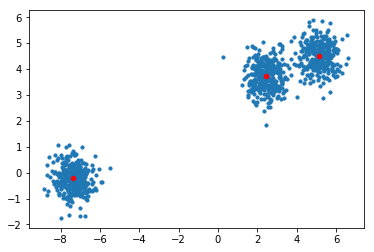

In [20]:
plt.scatter(X[:,0], X[:,1],s=10)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=20, c='r')

### Working on house price data

In [21]:
import pandas as pd

In [22]:
house_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt',index_col='Unnamed: 0')

In [24]:
house_data[:5]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


### Preprocessing
* Data columns are in different scale. Some columns are in single digits & few are in 5 digits
* Distance based ML algos are effected if data scale is not same.

### Transforming all the columns in the scale of 0-1 using MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mm = MinMaxScaler()

In [29]:
house_data_tf = mm.fit_transform(house_data)

In [31]:
house_data_tf[:5]

array([[0.14886731, 0.04761905, 0.16216216, 0.16666667, 0.5       ,
        0.4       , 0.22919229],
       [0.32297735, 0.19047619, 0.16216216, 0.5       , 0.5       ,
        0.4       , 0.29479295],
       [0.14174757, 0.19047619, 0.16216216, 0.16666667, 0.5       ,
        0.2       , 0.21279213],
       [0.2       , 0.04761905, 0.16216216, 0.33333333, 0.5       ,
        0.4       , 0.15949159],
       [0.11067961, 0.47619048, 0.35135135, 0.33333333, 0.5       ,
        0.4       , 0.15949159]])

### Problem Statement : Grouping similar houses together
* Things we don't know - Optimal value k

In [32]:
kmeans = KMeans(n_clusters=3)

In [33]:
kmeans.fit(house_data_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
cluster_num = kmeans.predict(house_data_tf)

In [36]:
house_data['cluster_no'] = cluster_num

In [40]:
house_data[house_data.cluster_no == 1]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster_no
6,1127.886,11,12,4,2,2,148000,1
13,1352.040,9,19,4,2,2,39000,1
15,2134.800,10,19,3,2,2,55000,1
16,2768.124,6,19,3,2,2,100000,1
19,2739.660,6,19,3,2,2,90000,1
21,2490.600,19,21,5,3,4,140000,1
22,2768.124,6,19,3,2,2,100000,1
25,3664.740,19,19,3,2,3,200000,1
26,1779.000,10,12,4,2,2,98000,1
27,3664.740,19,19,3,2,3,200000,1


* So, we were able to cluster the data into 3 groups
* We cannot have too many or too few cluster, we are looking for that optimal number

In [46]:
from sklearn.metrics import silhouette_score

In [51]:
res = []
for k in range(2,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(house_data_tf)
    labels = kmeans.predict(house_data_tf)
    res.append((k,silhouette_score(house_data_tf,labels)))

In [52]:
res

[(2, 0.24737956045980095),
 (3, 0.275702563469569),
 (4, 0.26466305762760023),
 (5, 0.24364923891731186),
 (6, 0.22614060597089702),
 (7, 0.22744997486560023)]

### Plotting the score
* k will be in x-axis & score will be in y-axis

### Image compression using Clustering

In [53]:
from skimage.io import imread,imshow

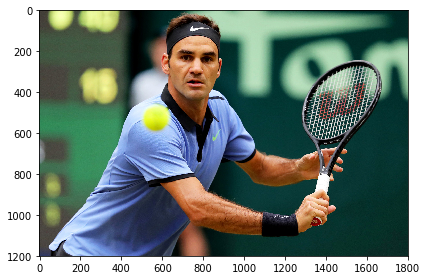

In [54]:
imshow('/home/awantik/Pictures/roger_federer_2.jpg')

In [56]:
img = imread('/home/awantik/Pictures/roger_federer_2.jpg')

In [57]:
img.shape

(1200, 1800, 3)

* Image processing needs them to converted in scale of 0-1

In [58]:
img = img/255

In [59]:
img

array([[[0.26666667, 0.25490196, 0.22745098],
        [0.25490196, 0.24313725, 0.21568627],
        [0.24705882, 0.23529412, 0.20784314],
        ...,
        [0.        , 0.14117647, 0.13333333],
        [0.        , 0.1372549 , 0.12941176],
        [0.        , 0.12941176, 0.13333333]],

       [[0.25490196, 0.24313725, 0.21568627],
        [0.25098039, 0.23921569, 0.21176471],
        [0.24313725, 0.23137255, 0.20392157],
        ...,
        [0.00784314, 0.14901961, 0.14117647],
        [0.00784314, 0.14901961, 0.14117647],
        [0.00392157, 0.14509804, 0.14509804]],

       [[0.27058824, 0.25882353, 0.23137255],
        [0.2627451 , 0.25098039, 0.22352941],
        [0.25882353, 0.24705882, 0.21960784],
        ...,
        [0.00784314, 0.14901961, 0.14117647],
        [0.01176471, 0.15294118, 0.14509804],
        [0.00784314, 0.14901961, 0.14901961]],

       ...,

       [[0.16470588, 0.19215686, 0.36470588],
        [0.17254902, 0.20784314, 0.37647059],
        [0.17647059, 0

### Things that have to be clear
* Each pixel is 3-d
* Each pixel represents color of that location
* For similar color, we will try to find the centroid.
* For all similar color pixels, we will replace them by centroid

In [60]:
kmeans = KMeans(n_clusters=6)

In [61]:
img_tf = img.reshape(1200*1800,3)

In [62]:
img_tf.shape

(2160000, 3)

In [63]:
kmeans.fit(img_tf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [64]:
labels = kmeans.predict(img_tf)

In [65]:
kmeans.cluster_centers_

array([[0.25414639, 0.38663173, 0.32966361],
       [0.70651648, 0.81772418, 0.81939805],
       [0.82546014, 0.69360061, 0.43971903],
       [0.04154355, 0.17170436, 0.16681643],
       [0.44082532, 0.57181473, 0.66540447],
       [0.55484916, 0.30874152, 0.15775143]])

* For each pixel, we will replace by centroid of the cluster to which the pixel belongs

In [66]:
img_com = kmeans.cluster_centers_[[kmeans.labels_]]

/home/awantik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [67]:
img_com.shape

(2160000, 3)

* We need to reshape the image so that we can plot it

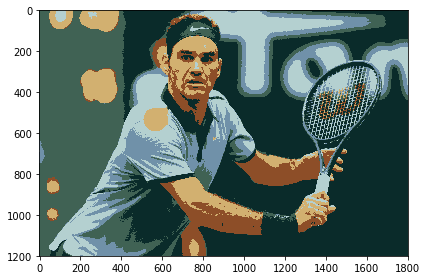

In [68]:

imshow(img_com.reshape(1200,1800,3))